 # import librarys

In [377]:
import nltk
nltk.download('nps_chat')
nltk.download('punkt')
import pandas as pd
import matplotlib.pyplot as plt


[nltk_data] Downloading package nps_chat to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [378]:
import boto3
from sagemaker import get_execution_role

role = get_execution_role()
bucket_name = 'deploy-sagemaker-conversation'


s3_url = 's3://deploy-sagemaker-conversation/floop_data_15k.json'
conn = boto3.client('s3')
contents = conn.list_objects(Bucket = bucket_name)['Contents']

s3 = boto3.resource('s3')

In [379]:
import json

In [380]:
s3_client = boto3.client('s3')
s3 = boto3.resource('s3')
obj = s3.Object('deploy-sagemaker-conversation',
                    'auto-floop-s3-export3.json')

In [381]:
data = json.load(obj.get()['Body'])

 
#print(data)
print(len(data))

3831


In [382]:
dataList=[]
for x in range(50):
    dataList.append(data[x])

     
 

In [383]:
for x in dataList:
     
    for y in range(len(x)):
             
        sentence = x[y].get('Text')

In [384]:
sentences = []
for x in dataList:
    for y in range(len(x)):       
        sentence = x[y].get('Text')
    sentences.append(sentence)
print(sentences)

['Eleborate and Write conclusion   3marks', 'If the temperature in a pond is lower, then the dissolved oxygen will be higher because gas escapes more readily in liquids at high temperature due to increased movement of kinetic energy (= increased movement of molecules)', 'Maybe there is a need to be clear about why they need large sums = e.g. think about the cost of the state of the art machinery that {{NAME}} uses in his factories.', 'iu98fgxv bm,÷\n"', 's-v', 'pronoun problem', '{{NAME}}, your handwriting is hard to read...please try printing...', 'Procedure', '{{ORGANIZATION}}', 'Nice paragraph!', "Yes ma'am", 'Its at the end next to {{NAME}}', 'We had a twelve word limit and  could and any more the the slide. Also, by overview, the is just an', '"', '"', '2.5 maks', 'Write proper intro and conclusion                                  Use textual language  and quality words and points                                  Write in points', 'Use textual language  and quality words and point

In [385]:
dataset = conn.get_object(Bucket = bucket_name, Key = 'floop_data_15k.json')

In [386]:
s3_client.get_object(Bucket = bucket_name, Key = 'floop_data_15k.json')

{'ResponseMetadata': {'RequestId': '5C3RHEFS774BA1KM',
  'HostId': 'LGa79dDmkDKSzyYg+hTJh4fuBfquvHQ7xgFazMztAeYsxAugDfMJHauvZM+pQ/f2+xofV3UVajA=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'LGa79dDmkDKSzyYg+hTJh4fuBfquvHQ7xgFazMztAeYsxAugDfMJHauvZM+pQ/f2+xofV3UVajA=',
   'x-amz-request-id': '5C3RHEFS774BA1KM',
   'date': 'Wed, 09 Mar 2022 01:05:23 GMT',
   'last-modified': 'Tue, 08 Mar 2022 03:46:41 GMT',
   'etag': '"a3348404dcdd900858622b6b828be02d"',
   'accept-ranges': 'bytes',
   'content-type': 'application/json',
   'server': 'AmazonS3',
   'content-length': '993'},
  'RetryAttempts': 0},
 'AcceptRanges': 'bytes',
 'LastModified': datetime.datetime(2022, 3, 8, 3, 46, 41, tzinfo=tzutc()),
 'ContentLength': 993,
 'ETag': '"a3348404dcdd900858622b6b828be02d"',
 'ContentType': 'application/json',
 'Metadata': {},
 'Body': <botocore.response.StreamingBody at 0x7f5aa93ca748>}

# Data

In [387]:
posts = nltk.corpus.nps_chat.xml_posts()[:10000]

Question_Words = [ 'where','how','why','did','do','does',"isn't",'has','am i', 'are','can','could','is','may',"can't", 
"didn't",'will','when',"doesn't","haven't",'have','what',"aren't",'would',"couldn't","wouldn't","won't","shouldn't",'should']

* input: chat posts
* Tokenize sentences using NLTK's word_tokenize
* return dict of tokenized words

In [388]:
def post_features(post):
    features = {}
    for word in nltk.word_tokenize(post):
        features['contains({})'.format(word.lower())] = True
         
    return features

 0. Input: none
 1. Divide data into 80% training and 10% testing sets
 2. Use NLTK's Multinomial Naive Bayes to perform classifcation    
 3. Return: Classifier object

In [389]:
def perform_classification():
        featuresets = [(post_features(post.text), post.get('class')) for post in posts]
         
         
        training_size = int(len(featuresets) * 0.1)
        train_set, test_set = featuresets[training_size:], featuresets[:training_size]
         
        classifier = nltk.NaiveBayesClassifier.train(train_set)
         
         
        return classifier
    
    
myclassifier= perform_classification()

1. Input a sentence
2. returns the type sentence

In [390]:
types = ["whQuestion","ynQuestion","Statement"]

def is_ques(ques):
    question_type = myclassifier.classify(post_features(ques)) 
     
    return  question_type

0. Method : IsQuestion
1. Input: Sentence to be predicted
2. Return: type of sentence it is using nltk 

In [391]:
def predict(data):
    type=is_ques(data)
    #print("type is"+type) 
    first_word = data.split()[0].lower()  
    types=[]
    
    if  ((type=="whQuestion" or type== "ynQuestion") or (first_word in Question_Words ))  :
             
        types.append("Question")
    
                                 
    elif type=="Statement" or data.endswith(".")or data.endswith("!"):
         types.append("Statement")
            

    else:        
        types.append("garbled text") 
    return types[0]

In [392]:
sent="More details.  A lot happened."

In [393]:
  
diss=predict(sent)
pred=[ ]
pred.append(diss) 

In [394]:
mydat={"sentence":diss}
print(mydat)

{'sentence': 'Statement'}


In [395]:
data = json.load(obj.get()['Body'])

In [396]:
analysis=[]
for i in sentences:
     
    analysis.append(predict(i))
     
    
print(len(analysis)) 

50


In [397]:
result = pd.DataFrame({'Original Data':dataList, 'Sentence Analysis':analysis})

In [398]:
result.to_csv('results.csv')

 

Statement       34
garbled text    15
Question         1
Name: Sentence Analysis, dtype: int64


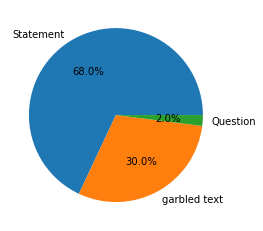

In [399]:
print(result['Sentence Analysis'].value_counts())
plt.pie(result['Sentence Analysis'].value_counts(), labels = result['Sentence Analysis'].value_counts().keys(), autopct='%.1f%%')
plt.show()